## Corridas de táxi Nova York ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium import plugins
%matplotlib inline
sns.set_style('whitegrid')

** Importando arquivo e avaliando o tipo dos dados **

In [2]:
df = pd.read_json('data-sample_data-nyctaxi-trips-2009-json_corrigido.json', lines=True)

In [3]:
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,tip_amount,tolls_amount,total_amount
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.0,62.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.733573,2.678209,-72.830595,40.124727,NaN,0.0,-72.848044,40.134998,9.629421,0.161939,0.408540,0.123594,10.326866
std,1.254536,3.130602,9.122398,5.026364,NaN,0.0,9.050547,4.986515,7.567481,0.308355,1.258633,0.761664,8.503211
min,0.000000,0.000000,-84.878351,-0.009262,NaN,0.0,-79.191394,-0.015202,2.500000,0.000000,0.000000,0.000000,2.500000
25%,1.000000,1.000000,-73.991124,40.736387,NaN,0.0,-73.990665,40.735366,5.400000,0.000000,0.000000,0.000000,5.700000
50%,1.000000,1.700000,-73.981110,40.754531,NaN,0.0,-73.979534,40.754488,7.300000,0.000000,0.000000,0.000000,7.800000
75%,2.000000,3.000000,-73.966815,40.768442,NaN,0.0,-73.963385,40.769523,10.900000,0.000000,0.000000,0.000000,11.400000
max,6.000000,49.920000,0.004023,47.922847,NaN,0.0,0.008668,47.935812,200.000000,1.000000,98.230000,20.000000,230.000000


In [4]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,tip_amount,tolls_amount,total_amount
0,CMT,2009-04-21T18:51:11.767205+00:00,2009-04-21T18:57:09.433767+00:00,2,0.80,-74.004114,40.742950,NaN,NaN,-73.994712,40.747950,Cash,5.4,0.0,0.0,0.0,5.4
1,CMT,2009-01-13T07:40:07.639754+00:00,2009-01-13T07:50:36.386011+00:00,1,5.40,-73.996506,40.747784,NaN,NaN,-73.940449,40.792385,Cash,15.4,0.0,0.0,0.0,15.4
2,VTS,2009-01-06T19:30:44.142187+00:00,2009-01-06T19:43:09.908429+00:00,5,1.67,-73.951340,40.752070,NaN,NaN,-73.944535,40.768108,CASH,6.1,1.0,0.0,0.0,7.1
3,VTS,2009-09-24T08:28:09.004451+00:00,2009-09-24T08:41:56.739991+00:00,1,4.13,-74.001117,40.729128,NaN,NaN,-73.958122,40.721812,CASH,12.9,0.5,0.0,0.0,13.4
4,VTS,2009-10-29T05:50:39.214629+00:00,2009-10-29T05:57:22.880174+00:00,1,2.03,-73.976600,40.756873,NaN,NaN,-73.979757,40.776075,CASH,7.7,0.5,0.0,0.0,8.2


** Verificando e limpando dados nulos **

In [5]:
df.isnull().sum()

vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
rate_code             1000000
store_and_fwd_flag     999938
dropoff_longitude           0
dropoff_latitude            0
payment_type                0
fare_amount                 0
surcharge                   0
tip_amount                  0
tolls_amount                0
total_amount                0
dtype: int64

In [6]:
df.dropna(axis=1, inplace=True)

In [7]:
df = df[df['passenger_count'] > 0]

### Qual o número total de viagens por passageiro no carro? ###

In [8]:
df['passenger_count'].value_counts()

1    647354
2    182448
5     84973
3     51940
4     29203
6      3971
Name: passenger_count, dtype: int64

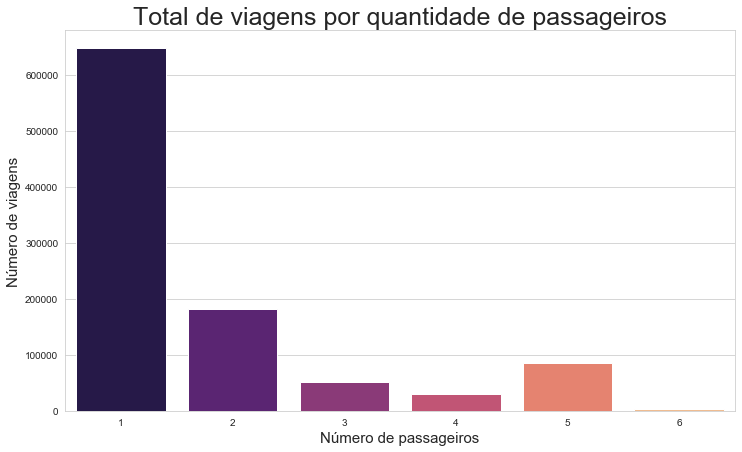

In [9]:
plt.figure(figsize=(12,7))
sns.countplot(x='passenger_count', data=df, palette='magma')
plt.xlabel('Número de passageiros', {'fontsize': 15})
plt.ylabel('Número de viagens', {'fontsize': 15})
plt.title('Total de viagens por quantidade de passageiros', fontdict={'fontsize': 25})
plt.show()

### Qual a média de gorjeta recebida com base no número de passageiros no veículo? ###

In [10]:
df.groupby('passenger_count')['tip_amount'].mean()

passenger_count
1    0.426762
2    0.378634
3    0.323334
4    0.241897
5    0.442615
6    0.434007
Name: tip_amount, dtype: float64

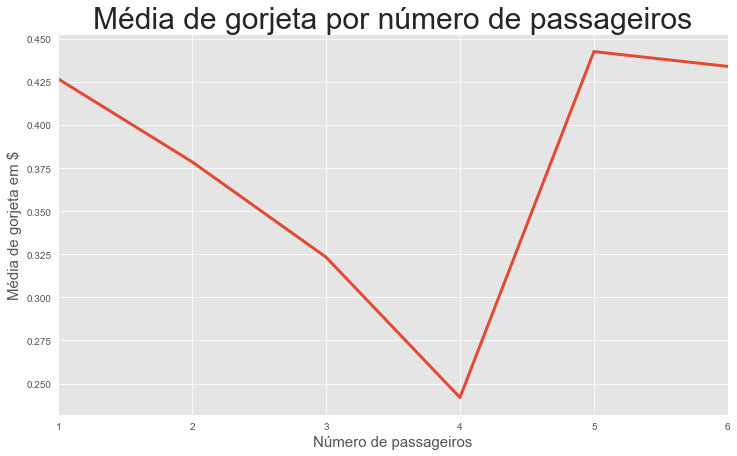

In [11]:
plt.figure(figsize=(12,7))
plt.style.use('ggplot')
df.groupby('passenger_count')['tip_amount'].mean().plot(lw=3)
plt.ylabel('Média de gorjeta em $', fontdict={'fontsize': 15})
plt.xlabel('Número de passageiros', {'fontsize': 15})
plt.title('Média de gorjeta por número de passageiros', fontdict={'fontsize': 30})
plt.show()

### Qual a média de distância percorrida considerando todas as corridas ? ###

In [12]:
df['trip_distance'].mean()

2.6782959938553907

### Qual a média de distância percorrida com base na quantidade de passageiros no veículo ?###

In [13]:
df.groupby('passenger_count')['trip_distance'].mean()

passenger_count
1    2.614013
2    2.835128
3    2.788150
4    2.793984
5    2.721652
6    2.736686
Name: trip_distance, dtype: float64

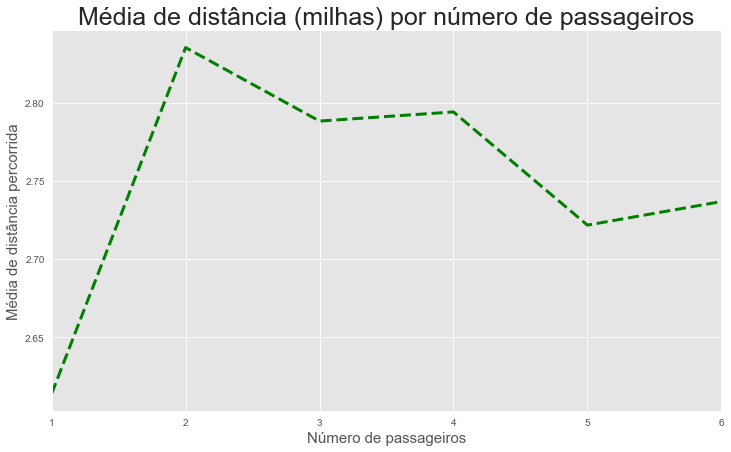

In [14]:
plt.figure(figsize=(12,7))
plt.style.use('ggplot')
df.groupby('passenger_count')['trip_distance'].mean().plot(color='green', lw=3, ls='--')
plt.ylabel('Média de distância percorrida', fontdict={'fontsize': 15})
plt.xlabel('Número de passageiros', {'fontsize': 15})
plt.title('Média de distância (milhas) por número de passageiros', fontdict={'fontsize': 25})
plt.show()

** Adicionando nome das empresas ao dataframe **

In [15]:
vendors = pd.read_csv('data-vendor_lookup-csv.csv')

In [16]:
vendors

,vendor_id,name,address,city,state,zip,country,contact,current
0,CMT,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
1,VTS,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes
2,DDS,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3,TS,Total Solutions Co,Five Boroughs Taxi Co.,Brooklyn,NY,11229,USA,mgmt@5btc.com,Yes
4,MT,Mega Taxi,4 East Jennings St.,Brooklyn,NY,11228,USA,contact@megataxico.com,No


In [17]:
dict_id_name = {vendors['vendor_id'][c]:vendors['name'][c] for c in range(len(vendors.vendor_id))}
dict_id_name

{'CMT': 'Creative Mobile Technologies, LLC',
 'VTS': 'VeriFone Inc',
 'DDS': 'Dependable Driver Service, Inc',
 'TS': 'Total Solutions Co',
 'MT': 'Mega Taxi'}

In [18]:
df['Company Name'] = df['vendor_id'].map(dict_id_name)

In [19]:
df['Company Name'].head()

0    Creative Mobile Technologies, LLC
1    Creative Mobile Technologies, LLC
2                         VeriFone Inc
3                         VeriFone Inc
4                         VeriFone Inc
Name: Company Name, dtype: object

### Quais as maiores empresas com base no total de dinheiro arrecadado ? ###

In [20]:
df.groupby('Company Name')['total_amount'].sum()

Company Name
Creative Mobile Technologies, LLC    4887271.07
Dependable Driver Service, Inc        677956.73
Total Solutions Co                        11.40
VeriFone Inc                         4760854.50
Name: total_amount, dtype: float64

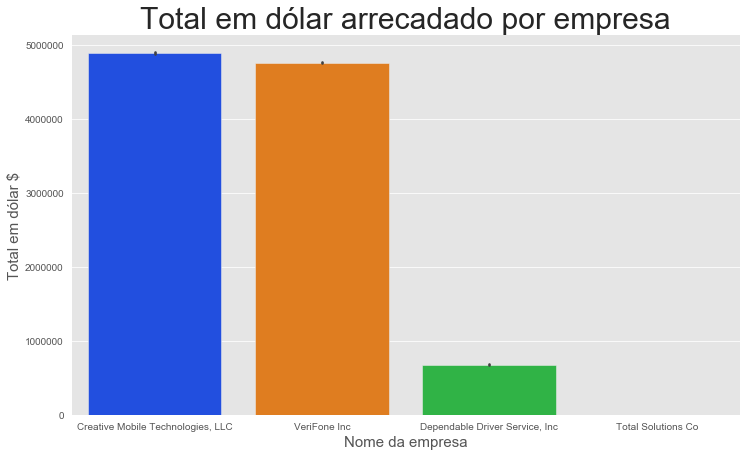

In [21]:
plt.figure(figsize=(12,7))
plt.style.use('ggplot')
sns.barplot(x='Company Name', y='total_amount', palette='bright', data=df, estimator=np.sum)
plt.ylabel('Total em dólar $', fontdict={'fontsize': 15})
plt.xlabel('Nome da empresa', {'fontsize': 15})
plt.title('Total em dólar arrecadado por empresa', fontdict={'fontsize': 30})
plt.show()

** Tipos de pagamento **

In [22]:
df['payment_type'].unique()

array(['Cash', 'CASH', 'Credit', 'CREDIT', 'No Charge', 'Dispute'],
      dtype=object)

In [23]:
df['payment_type'] = df['payment_type'].apply(lambda value: value.lower())

### Qual o total de dinheiro arrecadado com base no tipo de pagemento? ##

In [24]:
df.groupby('payment_type')['total_amount'].sum()

payment_type
cash         7619788.20
credit       2664316.04
dispute         7231.13
no charge      34758.33
Name: total_amount, dtype: float64

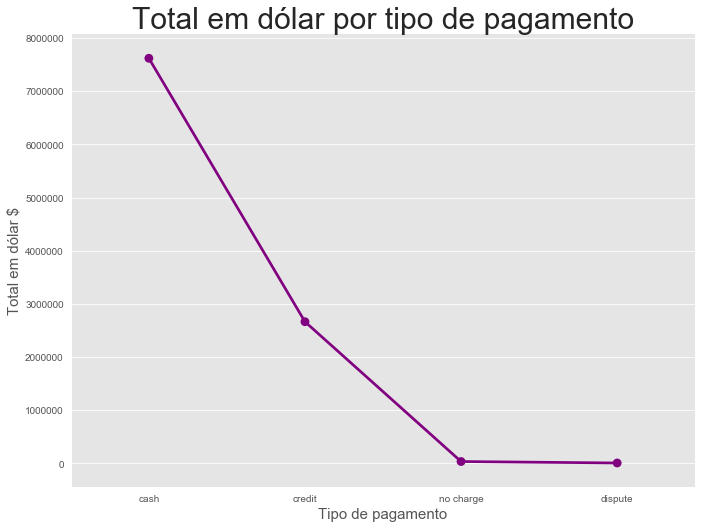

In [25]:
sns.catplot(x='payment_type', y='total_amount', data=df, estimator=np.sum, height=7, aspect=1.4, kind='point', color='purple')
plt.xlabel('Tipo de pagamento', fontdict={'fontsize': 15})
plt.ylabel('Total em dólar $', fontdict={'fontsize': 15})
plt.title('Total em dólar por tipo de pagamento', fontdict={'fontsize': 30})
plt.show()

** Adicionando colunas de tempo ao dataframe **

In [26]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [27]:
months = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October',
         11:'November', 12:'December'}

In [28]:
df['Day'] = df['pickup_datetime'].apply(lambda time: time.day)
df['Month'] = df['pickup_datetime'].apply(lambda time: time.month)
df['Month'] = df['Month'].map(months)

In [29]:
df['Hour Pickup'] = df['pickup_datetime'].apply(lambda time: time.time)
df['Hour Dropoff'] = df['dropoff_datetime'].apply(lambda time: time.time)

In [30]:
df['Hour'] = df['Hour Pickup'].apply(lambda time: time.hour)

In [31]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,...,surcharge,tip_amount,tolls_amount,total_amount,Company Name,Day,Month,Hour Pickup,Hour Dropoff,Hour
0,CMT,2009-04-21 18:51:11.767205+00:00,2009-04-21 18:57:09.433767+00:00,2,0.80,-74.004114,40.742950,-73.994712,40.747950,cash,...,0.0,0.0,0.0,5.4,"Creative Mobile Technologies, LLC",21,April,18:51:11.767205,18:57:09.433767,18
1,CMT,2009-01-13 07:40:07.639754+00:00,2009-01-13 07:50:36.386011+00:00,1,5.40,-73.996506,40.747784,-73.940449,40.792385,cash,...,0.0,0.0,0.0,15.4,"Creative Mobile Technologies, LLC",13,January,07:40:07.639754,07:50:36.386011,7
2,VTS,2009-01-06 19:30:44.142187+00:00,2009-01-06 19:43:09.908429+00:00,5,1.67,-73.951340,40.752070,-73.944535,40.768108,cash,...,1.0,0.0,0.0,7.1,VeriFone Inc,6,January,19:30:44.142187,19:43:09.908429,19
3,VTS,2009-09-24 08:28:09.004451+00:00,2009-09-24 08:41:56.739991+00:00,1,4.13,-74.001117,40.729128,-73.958122,40.721812,cash,...,0.5,0.0,0.0,13.4,VeriFone Inc,24,September,08:28:09.004451,08:41:56.739991,8
4,VTS,2009-10-29 05:50:39.214629+00:00,2009-10-29 05:57:22.880174+00:00,1,2.03,-73.976600,40.756873,-73.979757,40.776075,cash,...,0.5,0.0,0.0,8.2,VeriFone Inc,29,October,05:50:39.214629,05:57:22.880174,5


### Mapa de calor - quantidade total de passageiros - dia x hora ###

In [32]:
day_month = df.pivot_table(values='passenger_count', index='Hour', columns='Day', aggfunc=np.sum, fill_value=0)
day_month

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,2285,2388,2206,2436,2571,2337,2499,2477,2600,2349,...,2362,2281,2322,2399,2312,2505,2322,2174,2289,1360
1,2418,2224,2306,2583,2566,2550,2500,2561,2526,2393,...,2320,2393,2347,2355,2396,2301,2318,2153,2125,1279
2,2383,2260,2375,2392,2505,2691,2617,2627,2408,2266,...,2360,2257,2323,2248,2273,2430,2384,2045,2037,1226
3,2266,2256,2245,2629,2557,2591,2536,2582,2465,2387,...,2325,2547,2336,2415,2295,2297,2172,2056,2175,1221
4,2301,2389,2232,2522,2464,2483,2456,2624,2627,2490,...,2469,2326,2395,2280,2360,2141,2344,2248,2212,1336
5,2308,2430,2285,2709,2556,2615,2627,2503,2587,2316,...,2174,2262,2346,2387,2328,2209,2380,2102,2121,1344
6,2259,2356,2388,2527,2528,2643,2530,2674,2550,2324,...,2429,2267,2247,2149,2445,2287,2347,2203,2010,1291
7,2411,2489,2316,2727,2531,2737,2543,2618,2470,2452,...,2305,2459,2398,2423,2239,2251,2395,2070,2185,1328
8,2405,2302,2212,2380,2471,2552,2527,2505,2414,2416,...,2314,2349,2360,2418,2319,2319,2487,2083,2100,1202


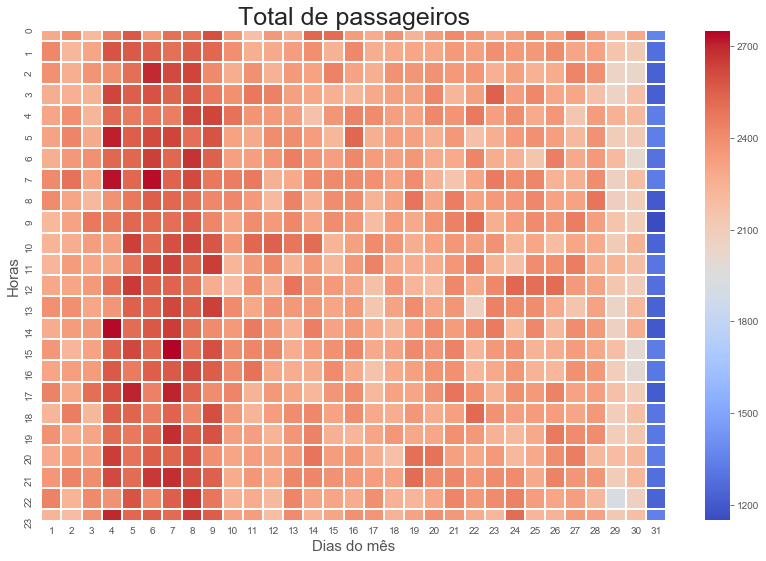

In [33]:
plt.figure(figsize=(14,9))
sns.heatmap(day_month,cmap='coolwarm',linecolor='white',linewidths=1)
plt.ylabel('Horas', fontdict={'fontsize': 15})
plt.xlabel('Dias do mês', {'fontsize': 15})
plt.title('Total de passageiros', fontdict={'fontsize': 25})
plt.show()

### Correlação entre as colunas do dataframe ###

In [34]:
df.corr()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,tip_amount,tolls_amount,total_amount,Day,Hour
passenger_count,1.000000,0.016822,-0.012111,0.011888,-0.012596,0.012372,0.009013,0.133524,-0.010674,0.010650,0.012169,0.001456,0.000796
trip_distance,0.016822,1.000000,0.001896,-0.001491,0.001436,-0.001250,0.898990,-0.023253,0.284922,0.505304,0.887039,0.000014,-0.000200
pickup_longitude,-0.012111,0.001896,1.000000,-0.999785,0.988923,-0.988856,0.004739,-0.023277,0.001238,-0.001794,0.003393,-0.001334,-0.000211
pickup_latitude,0.011888,-0.001491,-0.999785,1.000000,-0.988783,0.988970,-0.004398,0.023335,-0.001241,0.002621,-0.003014,0.001338,0.000206
dropoff_longitude,-0.012596,0.001436,0.988923,-0.988783,1.000000,-0.999775,0.003839,-0.023631,0.000302,-0.002527,0.002375,-0.001333,-0.000013
dropoff_latitude,0.012372,-0.001250,-0.988856,0.988970,-0.999775,1.000000,-0.003795,0.023796,-0.000492,0.002781,-0.002337,0.001318,0.000014
fare_amount,0.009013,0.898990,0.004739,-0.004398,0.003839,-0.003795,1.000000,-0.047293,0.337212,0.503332,0.983709,0.000211,-0.000177
surcharge,0.133524,-0.023253,-0.023277,0.023335,-0.023631,0.023796,-0.047293,1.000000,0.010128,-0.031289,-0.007122,0.000940,-0.000971
tip_amount,-0.010674,0.284922,0.001238,-0.001241,0.000302,-0.000492,0.337212,0.010128,1.000000,0.229186,0.469387,0.000496,-0.000681
tolls_amount,0.010650,0.505304,-0.001794,0.002621,-0.002527,0.002781,0.503332,-0.031289,0.229186,1.000000,0.570242,0.000329,-0.000946


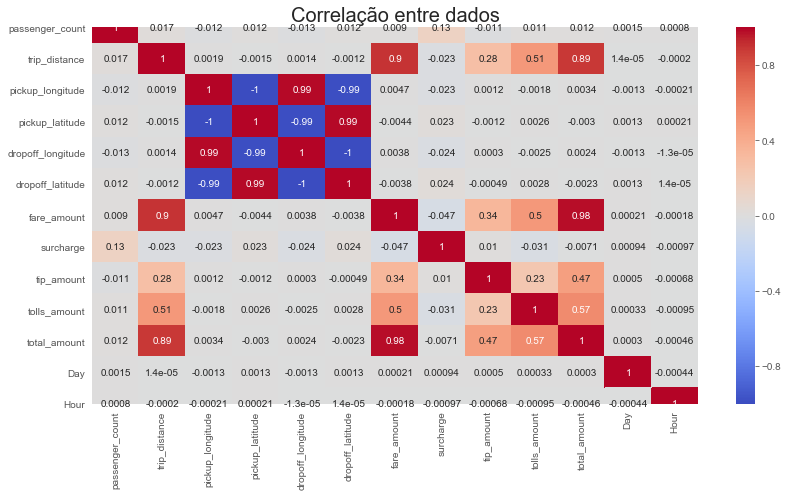

In [35]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlação entre dados', fontdict={'fontsize': 20}, weight='light')
plt.tight_layout()
plt.show()

### Mapa de calor - destino inicial ###

In [36]:
coordenadas = []
lat = df['pickup_latitude'][::2500].values
long = df['pickup_longitude'][::2500].values

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

mapa = folium.Map(location=[40.6643,-73.9385],tiles='Stamen Toner',zoom_start=10)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

### Mapa de calor - destino final ###

In [37]:
coordenadas1 = []
lat = df['dropoff_latitude'][::2500].values
long = df['dropoff_longitude'][::2500].values

for la,lo in zip(lat,long):
    coordenadas1.append([la,lo])

mapa = folium.Map(location=[40.6643,-73.9385],tiles='Stamen Toner',zoom_start=10)
mapa.add_child(plugins.HeatMap(coordenadas1))
mapa